<img src="Logo_U.jpeg" style="float:right;height:100px">
<img src="Logo_inf.jpeg" style="float:left;height:100px">
<center>
    <h1> INF-393 Máquinas de Aprendizaje II-2019</h1>
    <h1> Tarea 0 - Introducción a Máquinas de Aprendizaje </h1>
</center>
<br>
<center>  Francisco Solar / 201573524-5  <br>
Francisco Farias / 201573601-4</center>
** Formalidades **  
* Equipos de trabajo de: 2 personas
* Se debe preparar un (breve) Jupyter/IPython notebook que explique la actividad realizada y las conclusiones del trabajo
* Fecha de entrega: 6 de Septiembre.
* Formato de entrega: envı́o de link Github al correo electrónico del ayudante (*<francisco.mena.13@sansano.usm.cl>*) , incluyendo al profesor en copia (*<jnancu@inf.utfsm.cl>*). Por favor especificar el siguiente asunto: [Tarea0-INF393-II-2019]

<hr style="height:2px;border:none"/>

La tarea se divide en secciones:

[1.](#primero) Perceptrón a mano

<hr style="height:2px;border:none"/>

<a id="primero"></a>
## 1. Perceptrón a mano

<img src="https://miro.medium.com/max/1838/1*n6sJ4yZQzwKL9wnF5wnVNg.png" width="40%"  />

En esta sección se le pedirá que implemente el algoritmo online del *perceptrón* [[2]](#refs) para aprender una función de separación lineal en un problema de clasificación binaria (0 o 1) a través de la función de *treshold*. Un algoritmo online, como el caso del *perceptrón*, aprende de una instancia de dato a la vez $(x^{(i)},y^{(i)})$, dentro de un conjunto de datos $\{(x^{(1)},y^{(1)}), (x^{(2)},y^{(2)}), \ldots, (x^{(N)},y^{(N)})  \}$, donde la predicción de la clase para cada instancia es través de la función de *treshold*:

$$
\hat{y_i} = f(x^{(i)};w,b) = \left\{ \begin{array}{lc}
       1 &  si \ \sum_j w_j \cdot x^{(i)}_j +b \geq \theta \\
       0 &  si \ \sum_j w_j \cdot x^{(i)}_j +b < \theta
     \end{array} \right.
$$


Donde $\theta = 0$. Recordar que el *bias* $b$ se puede incluir dentro de los pesos/parámetros $w$ si se agrega una columna extra de 1's a los datos de entrada $x$ (*como se ve en la imagen anterior*). 

Para lo que sigue de la actividad sólo podrá utilizar *numpy* (para operaciones de algebra lineal).

> a) Escriba una función que calcule el valor de salida (*output*) del modelo $f(x)$ para un patrón de entrada $x$ a través de los pesos $w$ del modelo. *Decida si incluir los bias dentro de $w$ o manejarlos de manera separada*.


> b) Escriba una función que implemente el clásico algoritmo del **Perceptrón** para un problema binario que permita entrenarlo en un conjunto de datos de tamaño $N$, leídos de manera *online* (uno a uno). *Recordar la decisión anterior sobre los bias*.

> c) Demuestre que lo implementado funciona en un problema real de clasificación. Para esto utilice el dataset **Breast cancer wisconsin**, disponible a través de la librería __[*sklearn*](http://scikit-learn.org)__, el cual corresponde a la detección de cancer mamario a través de características relevantes (numéricas continuas) de un examen realizado, como por ejemplo la textura, simetría y tamaño de una masa mamaria. Estas características deben combinarse linealmente para la detección del cancer.
> <div class="alert alert-block alert-info">Es una buena práctica el normalizar los datos antes de trabajar con el modelo</div>
```python
from sklearn.datasets import load_breast_cancer
X_train,y_train = load_breast_cancer(return_X_y=True)
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_train = np.c_[X_train, np.ones(N) ] #add columns of 1's if you want
```
Para evaluar los resultados mida la exactitud (*accuracy*) de la clasificación durante el entrenamiento (por cada iteración/instancia/dato) y grafique, utilice el conjunto de entrenamiento realizando una sola pasada (el objetivo de esta sección es familiarizarse con el algoritmo). Además reporte el tiempo de entrenamiento mediante el algoritmo implementado.


#### Respuestas A,B,C

En este apartado se respondieron las preguntas anteriores, unidas en el codigo que se utilizó para calcular el item c)

0.958041958041958


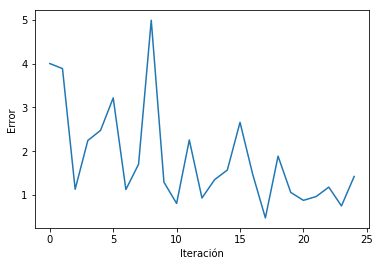

In [5]:
from numpy import hstack
from numpy import ones
import pandas as pd
import csv
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.datasets import load_breast_cancer
class Aprendizaje:

    #inicializador del perceptron
    def __init__(self, tasa_aprendizaje=0.1,matriz_x = []):
        self.weight = []
        self.largo_vector = len(matriz_x[0])
        self.tasa_aprendizaje = tasa_aprendizaje
        self.matriz_x = matriz_x
        self.errors_=[]
        

    def create_matriz_x(self):
        with open('test.csv', 'rb') as f:
            reader = csv.reader(f)
            self.matriz_x = map(tuple, reader)
    
    def init_weight(self,matriz_x):
        vector_w_1 =[0]*(self.largo_vector)
        self.weight = vector_w_1
  
    """def add_bias(self,matriz_x):
        unos=ones([self.largo_vector+1,1])
        matriz_x_con_bias=hstack((unos,matriz_x))
        return matriz_x_con_bias"""
  
    #función encargada de actualizar el peso de un X_i_j
    def cambio_weight(self,entrada_j_i,y_gorrito,y_correcto): 
        delta_i = self.tasa_aprendizaje*(float(y_correcto) - float(y_gorrito))* entrada_j_i
        return delta_i

    #función de actualización de pesos por iteracion sobre vector de la matriz x
    def actualizar_pesos(self,entrada_i,y_gorrito,y_correctito):
        Error=0
        for i in range(len(self.weight)):
            delta = self.cambio_weight(entrada_i[i],y_gorrito,y_correctito)
            self.weight[i] = self.weight[i] + delta
            Error +=delta
        return Error
    
    #función de entrenamiento
    def machine(self,y_correcto,theta):
        
        vector_resultado = []
        otro_contador = 0
        for entrada_i in self.matriz_x:
            
            suma= 0
            con_1 = 0
            for x in entrada_i:
                suma = suma + x * self.weight[con_1]
                con_1=con_1+1

            if suma >= theta:
                vector_resultado.append(1)
                Error=self.actualizar_pesos(entrada_i,1,y_correcto[otro_contador])
                if (Error!=0.0):
                    self.errors_.append(abs(Error))
            else:
                vector_resultado.append(0)
                Error=self.actualizar_pesos(entrada_i,0,y_correcto[otro_contador]) 
                if (Error!=0.0):
                    self.errors_.append(abs(Error))
            otro_contador = otro_contador + 1

    #función de testing
    def prueba(self,matriz_x_test,theta,y_correcto):
        
        
        nominador=0
        contador_y=0
        
        for vector_matriz in matriz_x_test:
            
            suma=0
            for i in range(self.largo_vector):
                suma = suma + self.weight[i]*vector_matriz[i]
        
            if suma >= theta: #suma mayor a 0 => 1
                if y_correcto[contador_y] == 1:
                    nominador = nominador + 1    
            else:
                if y_correcto[contador_y] == 0:
                    nominador = nominador + 1

            contador_y = contador_y + 1
        
        return nominador/len(matriz_x_test)


from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
X,Y = load_breast_cancer(return_X_y=True)

#normalización
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

scaler = StandardScaler().fit(X_train)
scaler = StandardScaler().fit(X_test)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

X_train = np.c_[np.ones(426), X_train ] #add columns of 1's if you want
X_test = np.c_[np.ones(143), X_test ]


aprendizaje = Aprendizaje(0.2,X_train)
aprendizaje.init_weight(X_train)
aprendizaje.machine(Y_train,0)

porcentaje = aprendizaje.prueba(X_test,0,Y_test)
print(porcentaje)
plt.plot(aprendizaje.errors_)
plt.ylabel('Error')
plt.xlabel('Iteración')
plt.show()

> d) Escriba una función que implemente el **Forgetrón** [[3]](#refs) con una memoria de tamaño $K$ y la función de kernel como el producto interno (*inner-product*), esto es $<a,b> = \sum_i a_i \cdot b_i$.


> e) Vuelva a realizar el item c) para el **Forgetrón** con un $K=10$ y compare los resultados.




### ¿Qué sucede al variar la función objetivo del problema? 
Si utilizáramos la función de pérdida *binary cross entropy*, que castiga de manera suave los valores en que se equivoca el modelo a través de que el valor de salida sea una confiabilidad $g(x; w,b) \in [0,1]$.
$$
\ell (y, \ g(x;w,b)) = - y \cdot \log{(g(x;w,b))} - (1-y) \cdot \log{(1-g(x;w,b))}
$$

Realice una modificación al perceptrón para que entregue como salida una confiabilidad continua entre 0 y 1. Una buena aproximación de la función *treshold* (con $\theta=0$) del perceptrón es la función sigmoidal.

<img src="https://i.imgur.com/lr6F3Ur.png" width="60%"  />

Ésto sería modelar el perceptrón como:
$$
g(x^{(i)};w,b) = p(y=1|x^{(i)}) = \sigma \left( \sum_j w_j \cdot x^{(i)}_j +b \right)
$$

Con $\sigma$ la función sigmoidal de la forma $\sigma(\xi) = 1/(1+e^{-\xi}) $, la cual tiene una derivada cíclica que hace más fácil el cálculo: $\sigma'(\xi) = \sigma(\xi) (1-\sigma(\xi))$

> f) Escriba una función que compute la función sigmoidal para una entrada $\xi$ cualquiera. *Tenga cuidado con los límites de números que puede trabajar python (por ejemplo $\exp{800}\rightarrow +\infty$)*. *Se aconseja acotar/truncar los valores que entran a la función para que la operación se pueda realizar*. Además escriba una función que calcule la salida del nuevo modelo $g(x; w,b)$ con esta función sigmoidal.

> g) Escriba una función que calcule la función de pérdida descrita anteriormente para un dato $x^{(i)}$, utilizando $g(x^{(i)};w,b)$. *Tenga cuidado con los límites del logaritmo (recordad que $\log{0}\rightarrow +\infty$)*.

> h) Escriba una función que calcule el gradiente (derivada) de la función de pérdida anterior con respecto a los pesos del modelo $w$. *Se recomienda derivarla analíticamente y luego escribirla*. *Recuerde el uso de la regla de la cadena*.

> i) Realice una modificación al algoritmo implementado en b) (**Perceptrón**) para que se adapte a la función objetivo *binary cross entropy* implementada, para ésto haga uso del algoritmo de optimización SGD [[4]](#refs) (*Stochastic Gradient Descend*) con tasa de aprendizaje $\eta \in [0,1]$.

$$ \vec{w}^{(t+1)} \leftarrow \vec{w}^{(t)} - \eta \cdot \nabla_{\vec{w}^{(t)}} \ell $$

> j) Vuelva a realizar el item c) con esta modificación, además grafique la función de pérdida en el transcurso del entrenamiento. Compare los resultados.

#### Respuestas F,G,H,I,J

En este apartado se respondieron las preguntas anteriores, unidas en el codigo que se utilizó para calcular el item j)

0.8741258741258742


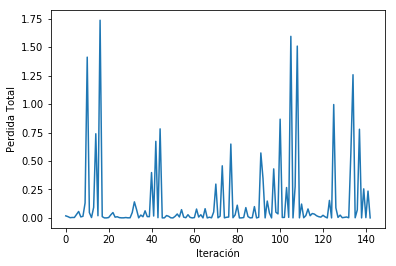

In [8]:
from numpy import hstack
from numpy import ones
from numpy import empty
import pandas as pd
import csv
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.datasets import load_breast_cancer
import math
class Binary_cross:

    def __init__(self, tasa_aprendizaje=0.1,matriz_x = []):
        self.weight = []
        self.largo_vector = len(matriz_x[0])
        self.tasa_aprendizaje = tasa_aprendizaje
        self.matriz_x = matriz_x
        self.errors_=[]


    def create_matriz_x(self):
        with open('test.csv', 'rb') as f:
            reader = csv.reader(f)
            self.matriz_x = map(tuple, reader)
            #print(self.matriz_x)
    
    def init_weight(self,matriz_x):
        vector_w_1 = [0]*(self.largo_vector)
        self.weight = vector_w_1
       #print(self.weight)
  

    def cambio_weight(self,entrada_j_i,y_gorrito,y_correcto): 
        delta_i = self.tasa_aprendizaje*(float(y_correcto) - float(y_gorrito))* entrada_j_i
        return delta_i
    

    def actualizar_pesos(self,entrada_i,y_gorrito,y_correctito):
        for i in range(len(self.weight)):
            self.weight[i] = self.weight[i] + self.cambio_weight(entrada_i[i],y_gorrito,y_correctito)
    
    #f) función que computa la funcion sigmoidal para una entrada Xi cualquiera
    def sigma(self,Xi):
        if (Xi<-799):
            valor = 0.00001
        else:
            if (Xi>=800):            
                valor = 1      
            else:
                valor = 1/(1+math.exp(-Xi))
        return valor
    
    
    #g) función que calcula la perdida
    #dado que esta utiliza funcion_g la cual a su vez utiliza la función sigma del item f)
    #no se tuvo que evaluar el caso del logaritmo ya que sigma se encarga de esto
    def perdida(self,entrada_i,y_correcto_i):
        value= (-y_correcto_i)*math.log(self.funcion_g(entrada_i),10)-(1-y_correcto_i)*math.log(1-self.funcion_g(entrada_i),10)
        self.errors_.append(value)
        return value
    
    
    def funcion_g(self,entrada_i):
      
        suma= 0
        con_1 = 0
        for x in entrada_i:
            suma = suma + x*self.weight[con_1]
            con_1=con_1+1
        algo = self.sigma(suma)
        return algo
    
    #h) función que calcula el gradiente, donde grad es la derivada de la función loss
    def gradiente(self,entrada_i,y_correcto_i,y_gorrito):
        suma= 0
        for x in entrada_i:
            suma = suma + x
        
        grad=-(self.sigma(suma))*((y_correcto_i/y_gorrito)+((1-y_correcto_i)/(1-y_gorrito)))
        return grad
    
    #i) función de actualización de pesos, para el binary cross entropy
    def cambio_weight_SGD(self,entrada_i,y_correcto,y_gorrito):
        delta_i = self.tasa_aprendizaje*self.gradiente(entrada_i,y_correcto,y_gorrito)
        return delta_i
    
    #i) función de actualización de pesos, para el binary cross entropy
    def actualizar_pesos_SGD(self,entrada_i,y_gorrito,y_correctito):
        for i in range(len(self.weight)):
            self.weight[i] = self.weight[i] + self.cambio_weight_SGD(entrada_i,y_correctito,y_gorrito)

    
    def iteracion_en_g(self,y_correcto):
        for entrada_i in self.matriz_x:
            funcion_g(entrada_i)
            


    def machine(self,y_correcto,theta):

        vector_resultado = []
        otro_contador = 0
        for entrada_i in self.matriz_x:
            
            suma= 0
            con_1 = 0
            for x in entrada_i:
                suma = suma + x*self.weight[con_1]
                con_1=con_1+1

            valor = self.sigma(suma)
            
            vector_resultado.append(valor)
            self.actualizar_pesos_SGD(entrada_i,valor,y_correcto[otro_contador])
            otro_contador = otro_contador + 1 
            
    def prueba(self,matriz_x_test,theta,y_correcto):
    
        
        nominador=0
        contador_y=0
      
        for vector_matriz in matriz_x_test:
            suma=0
            self.perdida(vector_matriz,y_correcto[contador_y])
            for i in range(self.largo_vector):
                suma = suma + self.weight[i]*vector_matriz[i]
        
            valor = self.sigma(suma)
            
            if valor >= 0.5: #suma mayor a 0 => 0.5
                if y_correcto[contador_y] == 1:
                    nominador = nominador + 1  
            else:
                if y_correcto[contador_y] == 0:
                    nominador = nominador + 1
                    
            contador_y = contador_y + 1
        
        return nominador/len(matriz_x_test)
          
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
X,Y = load_breast_cancer(return_X_y=True)

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

scaler = StandardScaler().fit(X_train)
scaler = StandardScaler().fit(X_test)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

X_train = np.c_[np.ones(426), X_train ] #add columns of 1's if you want
X_test = np.c_[np.ones(143), X_test ]

bc = Binary_cross(0.0006,X_train)
bc.init_weight(X_train)
bc.machine(Y_train,0)
bc.sigma(800)
print(bc.prueba(X_test,0,Y_test))

plt.plot(bc.errors_)
plt.ylabel('Perdida Total')
plt.xlabel('Iteración')
plt.show() 

### Conclusiónes

Al observar los resultados obtenidos, pudimos comprobar experimentalmente la validez del perceptrón, ya que, si bien es un algoritmo de aprendizaje de maquina antiguo, sigue siendo efectivo a la hora de realizar clasificaciónes, con una accuracy que en nuestro caso fue del 96% aproximado.
Además pudimos aprender a cerca de los distintos algoritmos que se desprenden del perceptron y como trabajan, lo cual al complementarlo con la teoría matematica, nos entrego un conocimiento mucho más amplio de como funciona en realidad el aprendizaje de maquina

<a id="refs"></a>
### Referencias
[1] Hastie, T.; Tibshirani, R., Friedman, J. (2009), *The Elements of Statistical Learning*, Second Edition.
Springer New York Inc.  
[2] STEPHEN, I. (1990). *Perceptron-based learning algorithms*. IEEE Transactions on neural networks, 50(2), 179.  
[3] Dekel, O., Shalev-Shwartz, S., & Singer, Y. (2006). *The Forgetron: A kernel-based perceptron on a fixed budget*. In Advances in neural information processing systems (pp. 259-266).  
[4] Ruder, S. (2016). *An overview of gradient descent optimization algorithms*. arXiv preprint arXiv:1609.04747.  